<center>
<h1>Iris Dataset</h1>
<img src="iris.png"/>
<img src="data-image.png"/>
</center>

Import Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [19]:
iris = datasets.load_iris(as_frame=True)
X = iris.data
y = iris.target
print(X)
print("---------------------------------")
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
---------------------------------
0     

In [20]:
X = X.drop(['sepal width (cm)','petal width (cm)',], axis=1)
print(X)

     sepal length (cm)  petal length (cm)
0                  5.1                1.4
1                  4.9                1.4
2                  4.7                1.3
3                  4.6                1.5
4                  5.0                1.4
..                 ...                ...
145                6.7                5.2
146                6.3                5.0
147                6.5                5.2
148                6.2                5.4
149                5.9                5.1

[150 rows x 2 columns]


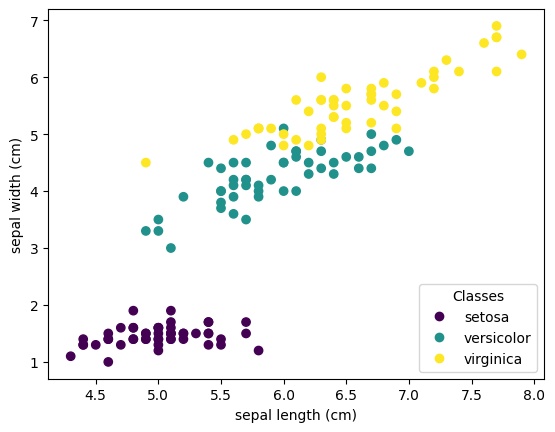

In [21]:
_, ax = plt.subplots()
scatter = ax.scatter(X["sepal length (cm)"], X["petal length (cm)"], c=y)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes");

<center>
<h1>Test-Train Split</h1>
<img src="tts.jpg"/>
</center>

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

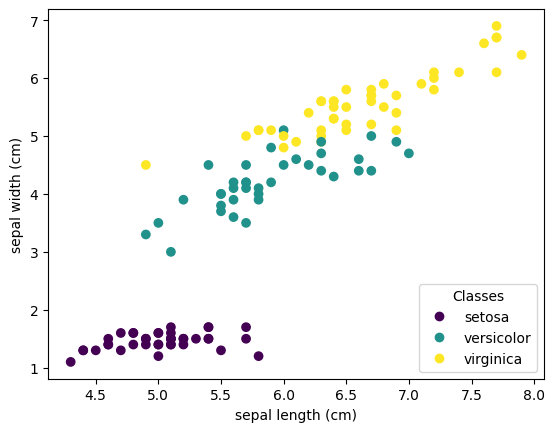

In [23]:
_, ax = plt.subplots()
scatter = ax.scatter(X_train["sepal length (cm)"], X_train["petal length (cm)"], c=y_train)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes");

In [37]:
# K-Near Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train, y_train);

In [38]:
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


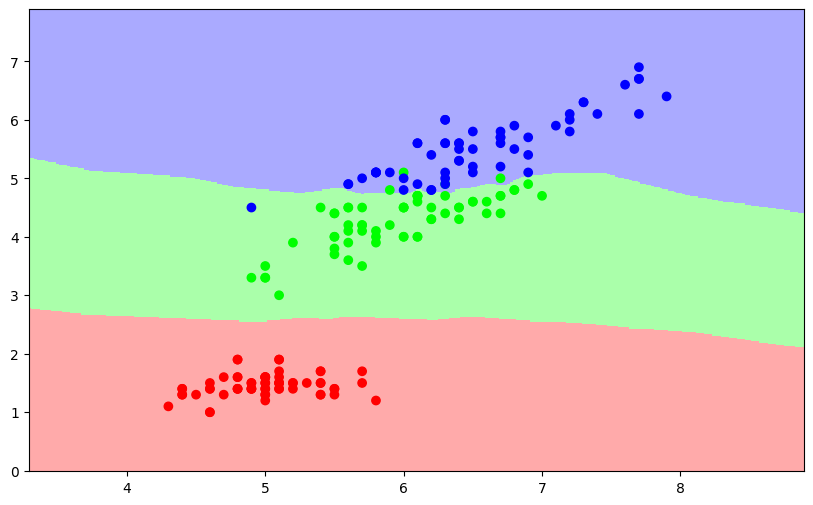

In [40]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors


h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_test["sepal length (cm)"], X_test["petal length (cm)"], c=y_pred, cmap=cmap_bold)
plt.scatter(X["sepal length (cm)"], X["petal length (cm)"], c=y, cmap=cmap_bold)
plt.show()